4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples and 
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [2]:
import pandas as pd
import numpy as np
#for visualization --
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [17]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.shape

(506, 14)

In [7]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [8]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [9]:
#Viewing the data statistics
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#finding the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

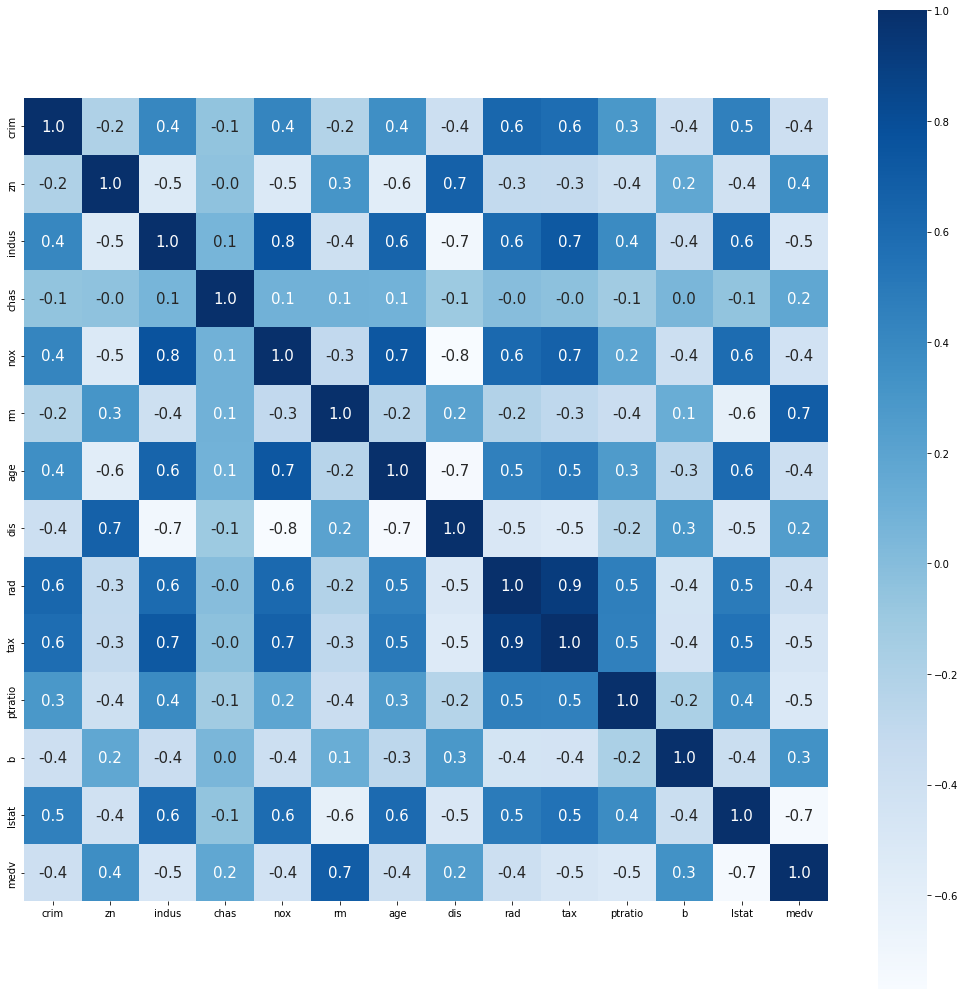

In [11]:
#plotting the heatmap of correlation
plt.figure(figsize = (18, 18))
sns.heatmap(corr, cbar=True, square =True,fmt='.1f', annot=True, annot_kws={'size':15} ,cmap="Blues")

In [12]:
x = df.drop(['medv'], axis= 1)
y = df['medv']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 4)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
#train the model using the treaining set
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
lm.intercept_

36.35704137659398

In [18]:
#model prediction based on the training data
y_pred = lm.predict(x_train)

In [19]:
#evaluation --
rmse = np.sqrt(np.mean((y_train - y_pred) ** 2))

In [20]:
print('RMSE:', rmse)

RMSE: 4.367343437774163


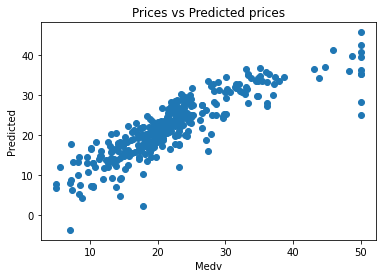

In [21]:
plt.scatter(y_train, y_pred)
plt.xlabel("Medv")
plt.ylabel("Predicted")
plt.title("Prices vs Predicted prices")
plt.show()

In [22]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_train, y_pred)

In [23]:
print("R-Squared Value - ", r_sqr)

R-Squared Value -  0.7465991966746854


In [24]:
y_test_pred = lm.predict(x_test)

In [25]:
#model evaluation
#evaluation --
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
print("rmse: ", rmse)

rmse:  5.482152251362979


In [26]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test, y_test_pred)

In [27]:
print("R-Squared Value - ", r_sqr)

R-Squared Value -  0.7121818377409193
